# Autoencoders

An autoencoder is a neural network designed to encode input data into a compressed representation (latent space) and then reconstruct it into its original form. It consists of two parts:

1. Encoder: Compresses the input into a smaller representation.
2. Decoder: Reconstructs the original input from the compressed representation. The goal is to minimize the difference between the input and the reconstructed output.

In [ ]:
import torch.nn.functional as f
import torchvision
import torchvision.transforms as transforms

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

## Data


In [ ]:
data_trasnform = transforms.ToTensor()

In [ ]:
dataset = torchvision.datasets.MNIST('./root' , transform = data_trasnform , download = True , train = True)
testset = torchvision.datasets.MNIST('./root' , transform = data_trasnform , download = True , train = False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.03MB/s]


Extracting ./root/MNIST/raw/train-images-idx3-ubyte.gz to ./root/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./root/MNIST/raw/train-labels-idx1-ubyte.gz to ./root/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]


Extracting ./root/MNIST/raw/t10k-images-idx3-ubyte.gz to ./root/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.06MB/s]


Extracting ./root/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./root/MNIST/raw



In [ ]:
batch_size=25
DEVICE="cuda"

In [ ]:
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=testset,  batch_size=batch_size, shuffle=False)

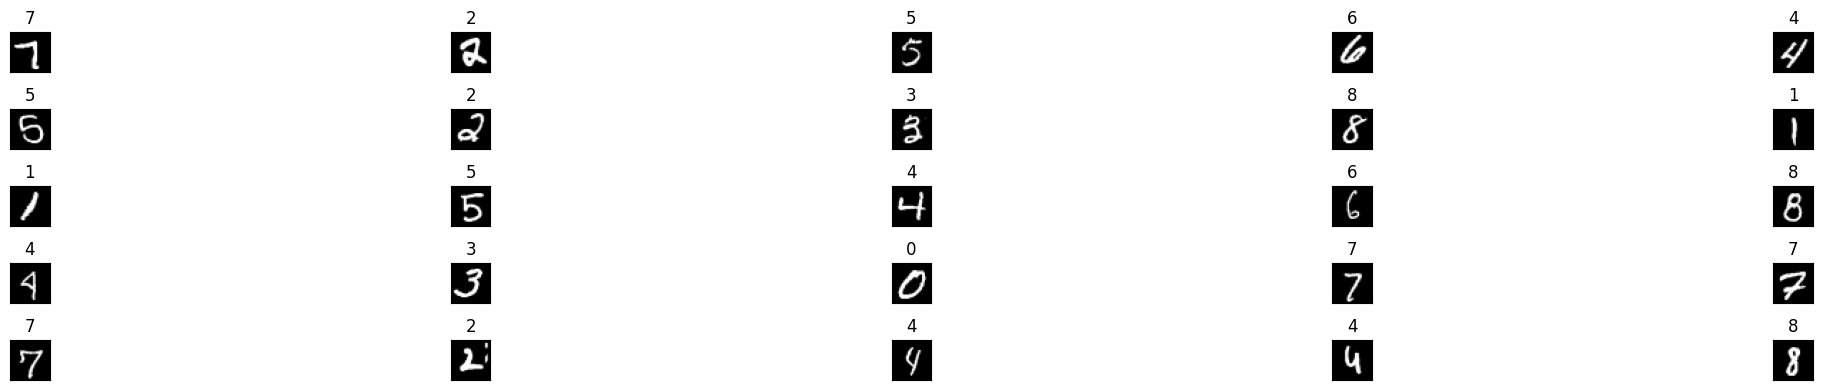

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter(train_loader))
images = images.cpu().numpy()
fig = plt.figure(figsize=(25, 4))
batchsize = images.shape[0]


for i in range(batchsize):

    cols = batchsize // 5 if batchsize >= 5 else batchsize
    ax = fig.add_subplot(5, cols, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(labels[i].item())


plt.tight_layout()
plt.show()


#1. AutoEncoder

In [ ]:
import torch
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self, latent_size):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, latent_size)
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x.view(x.size(0), -1))
        decoded = self.decoder(encoded)
        return encoded, decoded

In [ ]:
def show_images_side_by_side_AE(original, reconstructed, idx):

    original = original.detach().cpu().view(-1, 28, 28)
    reconstructed = reconstructed.detach().cpu().view(-1, 28, 28)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].imshow(original[idx].numpy(), cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(reconstructed[idx].numpy(), cmap="gray")
    axes[1].set_title("Reconstructed Image")
    axes[1].axis('off')

    plt.show()


In [ ]:
from torchsummary import summary
autoencoder = AutoEncoder(latent_size=3)
autoencoder.to(DEVICE)
summary(model=autoencoder, input_size=(1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
         LeakyReLU-2                  [-1, 512]               0
       BatchNorm1d-3                  [-1, 512]           1,024
            Linear-4                  [-1, 256]         131,328
         LeakyReLU-5                  [-1, 256]               0
       BatchNorm1d-6                  [-1, 256]             512
            Linear-7                    [-1, 3]             771
            Linear-8                  [-1, 256]           1,024
         LeakyReLU-9                  [-1, 256]               0
      BatchNorm1d-10                  [-1, 256]             512
           Linear-11                  [-1, 512]         131,584
        LeakyReLU-12                  [-1, 512]               0
      BatchNorm1d-13                  [-1, 512]           1,024
           Linear-14                  [

In the case of an autoencoder, the "predicted values" are the reconstructed inputs, and the "actual values" are the original inputs. By **minimizing MSE**, we ensure that the model learns to produce outputs as close as possible to the original inputs.

In [ ]:
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
loss_function = nn.MSELoss()
DEVICE="cuda"
n_epochs = 30

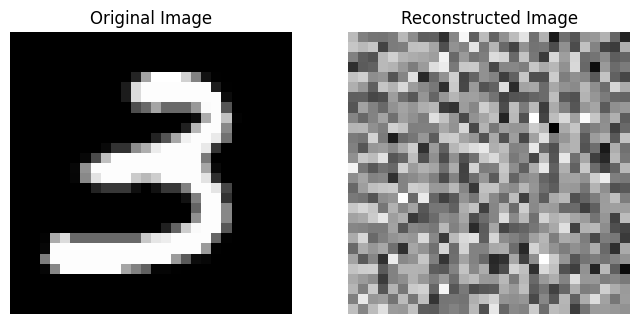

Epoch [1/30], Loss: 0.03636490926146507
Epoch [2/30], Loss: 0.04113556444644928
Epoch [3/30], Loss: 0.03314867988228798
Epoch [4/30], Loss: 0.03717981278896332
Epoch [5/30], Loss: 0.04016261547803879
Epoch [6/30], Loss: 0.03603534772992134
Epoch [7/30], Loss: 0.041851773858070374
Epoch [8/30], Loss: 0.04106409102678299
Epoch [9/30], Loss: 0.037454549223184586


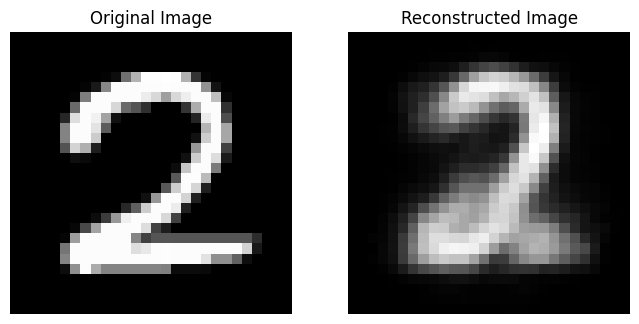

Epoch [10/30], Loss: 0.03596676513552666
Epoch [11/30], Loss: 0.03663603961467743
Epoch [12/30], Loss: 0.0337231270968914
Epoch [13/30], Loss: 0.035739872604608536
Epoch [14/30], Loss: 0.030962614342570305


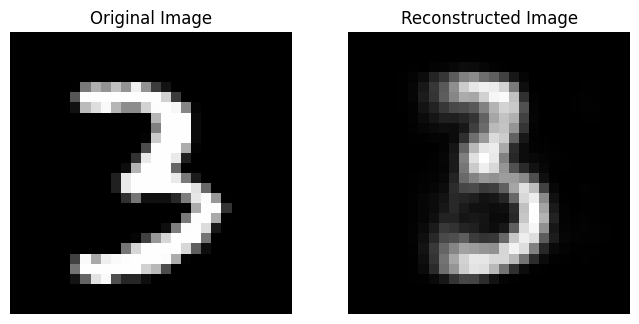

Epoch [15/30], Loss: 0.03998682647943497
Epoch [16/30], Loss: 0.037731997668743134
Epoch [17/30], Loss: 0.03760301694273949
Epoch [18/30], Loss: 0.03882522135972977
Epoch [19/30], Loss: 0.0381268747150898


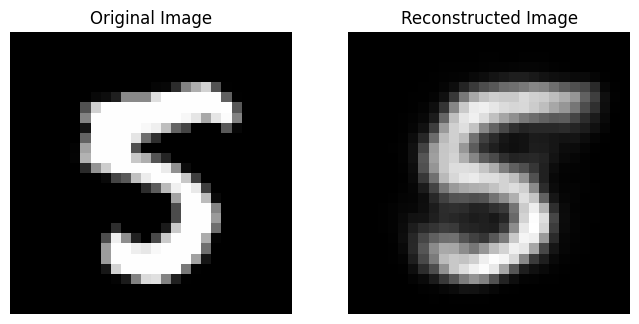

Epoch [20/30], Loss: 0.033359743654727936
Epoch [21/30], Loss: 0.03763134405016899
Epoch [22/30], Loss: 0.03471771255135536
Epoch [23/30], Loss: 0.040703970938920975
Epoch [24/30], Loss: 0.0334157757461071


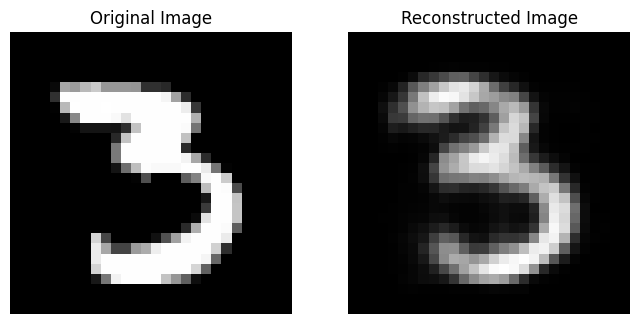

Epoch [25/30], Loss: 0.033879246562719345
Epoch [26/30], Loss: 0.038170382380485535
Epoch [27/30], Loss: 0.028460372239351273
Epoch [28/30], Loss: 0.02914981171488762
Epoch [29/30], Loss: 0.03708888962864876


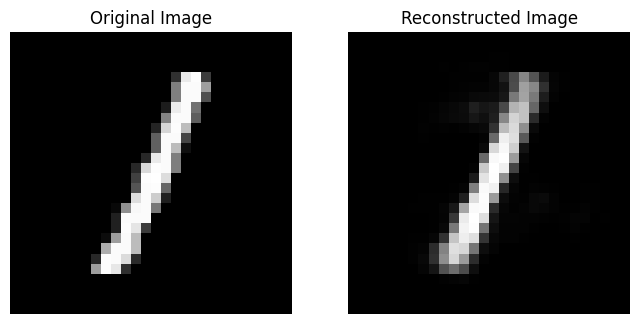

Epoch [30/30], Loss: 0.03683288022875786


In [ ]:
plot_epochs = [1, 10, 15, 20, 25, 30]

for epoch in range(n_epochs):
    for step, (x, y) in enumerate(train_loader):
        b_x = x.view(-1, 28*28).requires_grad_(True).to(DEVICE)
        b_y = x.view(-1, 28*28).requires_grad_(True).to(DEVICE)
        encoded, decoded = autoencoder(b_x)
        loss = loss_function(decoded, b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if epoch + 1 in plot_epochs and step == 0:
            show_images_side_by_side_AE(b_x, decoded, idx=0)

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item()}")

RATE=(latent_size * bit_depth) / input_size =(3 * 32)/(28 * 28)=0.1224 bpp

This model has a latent size= 3. Next we'll try to evaluate teh same moedl architecture using other latent sizes.

# Rate vs Distorsion for different latent sizes

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def evaluate_rate_distortion(model, dataloader, latent_size, input_dim, device="cpu"):
    total_pixels = input_dim
    bit_depth = 32
    bpp = (latent_size * bit_depth) / total_pixels
    print("Rate is (bpp): ",bpp)

    model.eval()
    psnr_list, ssim_list = [], []

    with torch.no_grad():
        for images, _ in dataloader:
            images = images.view(images.size(0), -1).to(device)
            _, decoded = model(images)

            # MSE
            mse = nn.functional.mse_loss(decoded, images).item()


            # PSNR
            psnr = 10 * torch.log10(torch.tensor(1.0) / torch.tensor(mse))
            psnr_list.append(psnr.item())

            # SSIM
            images_np = images.cpu().numpy().reshape(-1, 28, 28)
            decoded_np = decoded.cpu().numpy().reshape(-1, 28, 28)
            batch_ssim = []
            for i in range(images.size(0)):
                ssim_value, _ = ssim(images_np[i], decoded_np[i], data_range=1.0,full=True)
                batch_ssim.append(ssim_value)
            ssim_list.append(sum(batch_ssim) / len(batch_ssim))

    avg_psnr = sum(psnr_list) / len(psnr_list)
    avg_ssim = sum(ssim_list) / len(ssim_list)

    return bpp, avg_psnr, avg_ssim

In [ ]:
import time
def train_model(model, train_loader, optimizer, criterion, n_epochs, device="cuda"):
    model.train()
    start_time = time.time()
    for epoch in range(n_epochs):
        epoch_loss = 0.0
        for images, _ in train_loader:
            images = images.view(images.size(0), -1).to(device)

            optimizer.zero_grad()
            _, decoded = model(images)
            loss = criterion(decoded, images)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss / len(train_loader):.6f}")
    elapsed_time = time.time() - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")
    return elapsed_time

In [ ]:
input_dim = 28 * 28
latent_sizes = [2, 4, 5, 10, 15, 20]
results = {"bpp": [], "psnr": [], "ssim": []}

In [86]:
epochs=30

In [87]:
total_time = 0

for latent_size in latent_sizes:
    print(f"\nTraining model with latent size {latent_size}...")
    model = AutoEncoder(latent_size=latent_size).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()


    elapsed_time = train_model(model, train_loader, optimizer, criterion, epochs, DEVICE)
    total_time += elapsed_time


    bpp, psnr, ssim_val = evaluate_rate_distortion(model, test_loader, latent_size, input_dim, DEVICE)
    results["bpp"].append(bpp)
    results["psnr"].append(psnr)
    results["ssim"].append(ssim_val)

print(f"\nTotal training time for all models: {total_time:.2f} seconds.")



Training model with latent size 2...
Epoch 1/30, Loss: 0.054756
Epoch 2/30, Loss: 0.047275
Epoch 3/30, Loss: 0.045990
Epoch 4/30, Loss: 0.045073
Epoch 5/30, Loss: 0.044551
Epoch 6/30, Loss: 0.044154
Epoch 7/30, Loss: 0.043805
Epoch 8/30, Loss: 0.043598
Epoch 9/30, Loss: 0.043382
Epoch 10/30, Loss: 0.043235
Epoch 11/30, Loss: 0.043042
Epoch 12/30, Loss: 0.042821
Epoch 13/30, Loss: 0.042680
Epoch 14/30, Loss: 0.042557
Epoch 15/30, Loss: 0.042435
Epoch 16/30, Loss: 0.042334
Epoch 17/30, Loss: 0.042248
Epoch 18/30, Loss: 0.042109
Epoch 19/30, Loss: 0.042134
Epoch 20/30, Loss: 0.041977
Epoch 21/30, Loss: 0.041901
Epoch 22/30, Loss: 0.041842
Epoch 23/30, Loss: 0.041703
Epoch 24/30, Loss: 0.041708
Epoch 25/30, Loss: 0.041605
Epoch 26/30, Loss: 0.041587
Epoch 27/30, Loss: 0.041539
Epoch 28/30, Loss: 0.041398
Epoch 29/30, Loss: 0.041445
Epoch 30/30, Loss: 0.041314
Training completed in 445.07 seconds.
Rate is (bpp):  0.08163265306122448

Training model with latent size 4...
Epoch 1/30, Loss: 0

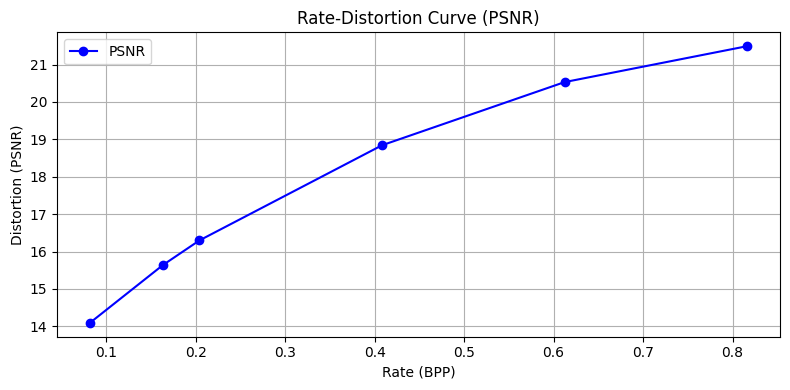

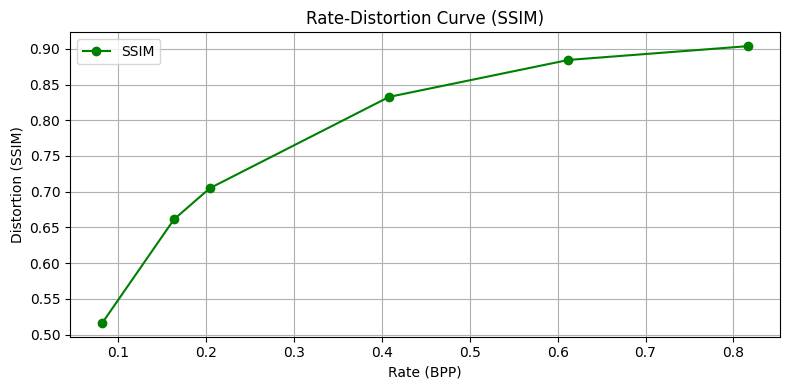

In [88]:
plt.figure(figsize=(8, 4))
plt.plot(results["bpp"], results["psnr"], marker='o', label="PSNR", color='blue')
plt.xlabel("Rate (BPP)")
plt.ylabel("Distortion (PSNR)")
plt.title("Rate-Distortion Curve (PSNR)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(results["bpp"], results["ssim"], marker='o', label="SSIM", color='green')
plt.xlabel("Rate (BPP)")
plt.ylabel("Distortion (SSIM)")
plt.title("Rate-Distortion Curve (SSIM)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In addition to the implementation of a **standard autoencoder**, we'll explore two important variations: **convolutional autoencoders** and **variational autoencoders**, in order to address different objectives and challenges in our data. We will explain our choice for each in the upcoming sections, highlighting their unique advantages and how they align with the goals of our project.

# 2. Convolutional Autoencoder

Convolutional autoencoders are particularly well-suited for processing image data, as they use convolutional layers to efficiently capture spatial features and hierarchical patterns, leading to better reconstructions for data with spatial structure.

This choice is driven by the inherent properties of image data, where the spatial relationships between pixels are crucial for understanding the content. Convolutional layers apply filters that capture local patterns, such as edges and textures, while pooling layers reduce spatial dimensions, allowing the model to learn abstract representations at multiple scales.
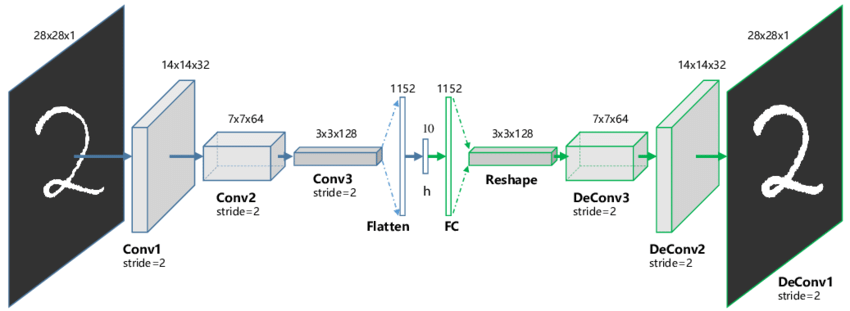

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms


In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 1e-3

In [ ]:
import torch
import torch.nn as nn

class ConvAutoEncoder(nn.Module):
    def __init__(self, latent_size):
        super(ConvAutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),  # Output: (32, 14, 14)
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),  # Output: (64, 7, 7)
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, latent_size, kernel_size=3, stride=2, padding=1),  # Output: (latent_size, 4, 4)
            nn.LeakyReLU(0.2),
        )


        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_size, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (64, 7, 7)
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(64),

            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (32, 14, 14)
            nn.LeakyReLU(0.2),
            nn.BatchNorm2d(32),

            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (1, 28, 28)
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
from torchsummary import summary


latent_size = 10
model = ConvAutoEncoder(latent_size=latent_size).to(DEVICE)

summary(model=model, input_size=(1, 28, 28))


Encoded shape: torch.Size([2, 10, 4, 4])
Decoded shape: torch.Size([2, 1, 32, 32])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             320
         LeakyReLU-2           [-1, 32, 14, 14]               0
       BatchNorm2d-3           [-1, 32, 14, 14]              64
            Conv2d-4             [-1, 64, 7, 7]          18,496
         LeakyReLU-5             [-1, 64, 7, 7]               0
       BatchNorm2d-6             [-1, 64, 7, 7]             128
            Conv2d-7             [-1, 10, 4, 4]           5,770
         LeakyReLU-8             [-1, 10, 4, 4]               0
   ConvTranspose2d-9             [-1, 64, 8, 8]           5,824
        LeakyReLU-10             [-1, 64, 8, 8]               0
      BatchNorm2d-11             [-1, 64, 8, 8]             128
  ConvTranspose2d-12           [-1, 32, 16, 16]          18,464
        LeakyReLU-13

In [ ]:
def plot_conv_reconstructed_images(model, dataloader, epoch,  device="cpu"):
    model.eval()


    images, _ = next(iter(dataloader))
    images = images.to(device)


    with torch.no_grad():
        _, decoded = model(images)


    decoded_resized = F.interpolate(decoded, size=(28, 28), mode='bilinear', align_corners=False)


    images = images.cpu().numpy()
    decoded_resized = decoded_resized.cpu().numpy()


    num_images = min(images.shape[0], 10)  # Plot only the first 10 images
    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 2))

    for i in range(num_images):

        axes[i, 0].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i, 0].set_title(f"Original {i + 1}")
        axes[i, 0].axis('off')


        axes[i, 1].imshow(decoded_resized[i].reshape(28, 28), cmap='gray')
        axes[i, 1].set_title(f"Reconstructed {i + 1}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
import torch.nn.functional as F

def train_conv_model(model, train_loader, optimizer, criterion, n_epochs, device="cpu"):
    model.train()
    start_time = time.time()
    for epoch in range(n_epochs):
        epoch_loss = 0.0
        for images, _ in train_loader:
            images = images.to(device)

            optimizer.zero_grad()
            _, decoded = model(images)

            # Resize the decoded image to match the input image size (28x28)
            decoded_resized = F.interpolate(decoded, size=(28, 28), mode='bilinear', align_corners=False)


            loss = criterion(decoded_resized, images)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss / len(train_loader):.6f}")
        if epoch == n_epochs - 1:
            plot_conv_reconstructed_images(model, test_loader, epoch + 1, device)


In [ ]:
import torch
import torch.nn as nn
from skimage.metrics import structural_similarity as ssim

def evaluate_conv_rate_distortion(model, dataloader, latent_size, input_dim, device="cpu"):

    total_pixels = input_dim
    bit_depth = 32
    bpp = (latent_size * bit_depth) / total_pixels
    print("Rate is (bpp): ", bpp)

    model.eval()
    psnr_list, ssim_list = [], []

    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            _, decoded = model(images)


            decoded_resized = nn.functional.interpolate(decoded, size=(28, 28), mode='bilinear', align_corners=False)

            # MSE
            mse = nn.functional.mse_loss(decoded_resized, images).item()

            # PSNR
            psnr = 10 * torch.log10(torch.tensor(1.0) / torch.tensor(mse))
            psnr_list.append(psnr.item())

            # SSIM
            images_np = images.cpu().numpy().reshape(-1, 28, 28)
            decoded_resized_np = decoded_resized.cpu().numpy().reshape(-1, 28, 28)
            batch_ssim = []
            for i in range(images.size(0)):
                ssim_value, _ = ssim(images_np[i], decoded_resized_np[i], data_range=1.0, full=True)
                batch_ssim.append(ssim_value)
            ssim_list.append(sum(batch_ssim) / len(batch_ssim))

    avg_psnr = sum(psnr_list) / len(psnr_list)
    avg_ssim = sum(ssim_list) / len(ssim_list)

    return bpp, avg_psnr, avg_ssim


# RE EXEC HERE


Training model with latent size 2...
Epoch 1/30, Loss: 0.026767
Epoch 2/30, Loss: 0.017523
Epoch 3/30, Loss: 0.016290
Epoch 4/30, Loss: 0.015590
Epoch 5/30, Loss: 0.015123
Epoch 6/30, Loss: 0.014759
Epoch 7/30, Loss: 0.014524
Epoch 8/30, Loss: 0.014310
Epoch 9/30, Loss: 0.014130
Epoch 10/30, Loss: 0.013970
Epoch 11/30, Loss: 0.013852
Epoch 12/30, Loss: 0.013701
Epoch 13/30, Loss: 0.013599
Epoch 14/30, Loss: 0.013505
Epoch 15/30, Loss: 0.013421
Epoch 16/30, Loss: 0.013338
Epoch 17/30, Loss: 0.013291
Epoch 18/30, Loss: 0.013212
Epoch 19/30, Loss: 0.013148
Epoch 20/30, Loss: 0.013102
Epoch 21/30, Loss: 0.013037
Epoch 22/30, Loss: 0.012994
Epoch 23/30, Loss: 0.012953
Epoch 24/30, Loss: 0.012896
Epoch 25/30, Loss: 0.012866
Epoch 26/30, Loss: 0.012818
Epoch 27/30, Loss: 0.012788
Epoch 28/30, Loss: 0.012746
Epoch 29/30, Loss: 0.012711
Epoch 30/30, Loss: 0.012688


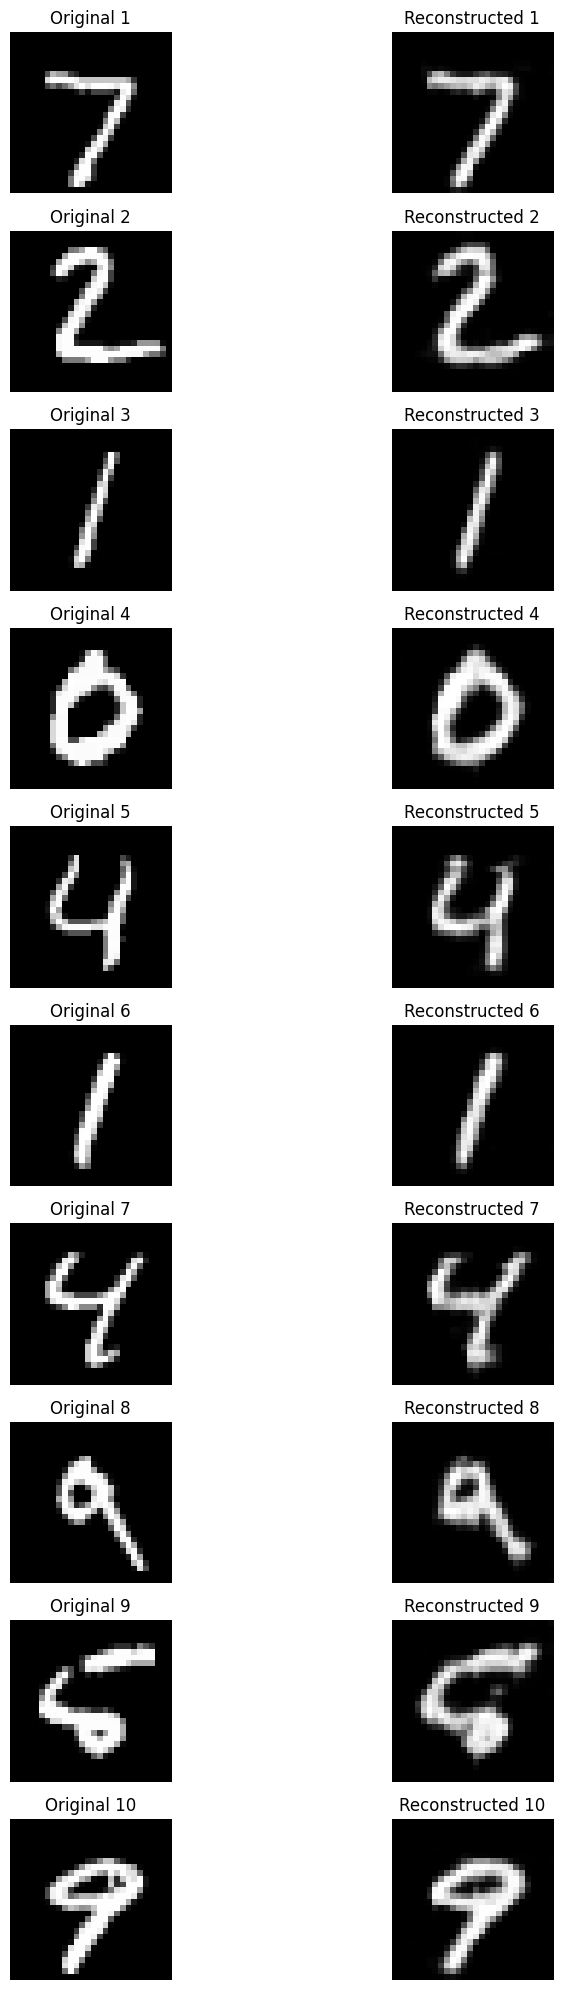

Rate is (bpp):  0.08163265306122448

Training model with latent size 4...
Epoch 1/30, Loss: 0.017795
Epoch 2/30, Loss: 0.009074
Epoch 3/30, Loss: 0.008176
Epoch 4/30, Loss: 0.007694
Epoch 5/30, Loss: 0.007383
Epoch 6/30, Loss: 0.007176
Epoch 7/30, Loss: 0.006982
Epoch 8/30, Loss: 0.006848
Epoch 9/30, Loss: 0.006740
Epoch 10/30, Loss: 0.006652
Epoch 11/30, Loss: 0.006555
Epoch 12/30, Loss: 0.006488
Epoch 13/30, Loss: 0.006412
Epoch 14/30, Loss: 0.006362
Epoch 15/30, Loss: 0.006310
Epoch 16/30, Loss: 0.006270
Epoch 17/30, Loss: 0.006234
Epoch 18/30, Loss: 0.006194
Epoch 19/30, Loss: 0.006157
Epoch 20/30, Loss: 0.006126
Epoch 21/30, Loss: 0.006089
Epoch 22/30, Loss: 0.006071
Epoch 23/30, Loss: 0.006035
Epoch 24/30, Loss: 0.006015
Epoch 25/30, Loss: 0.005994
Epoch 26/30, Loss: 0.005975
Epoch 27/30, Loss: 0.005956
Epoch 28/30, Loss: 0.005936
Epoch 29/30, Loss: 0.005921
Epoch 30/30, Loss: 0.005899


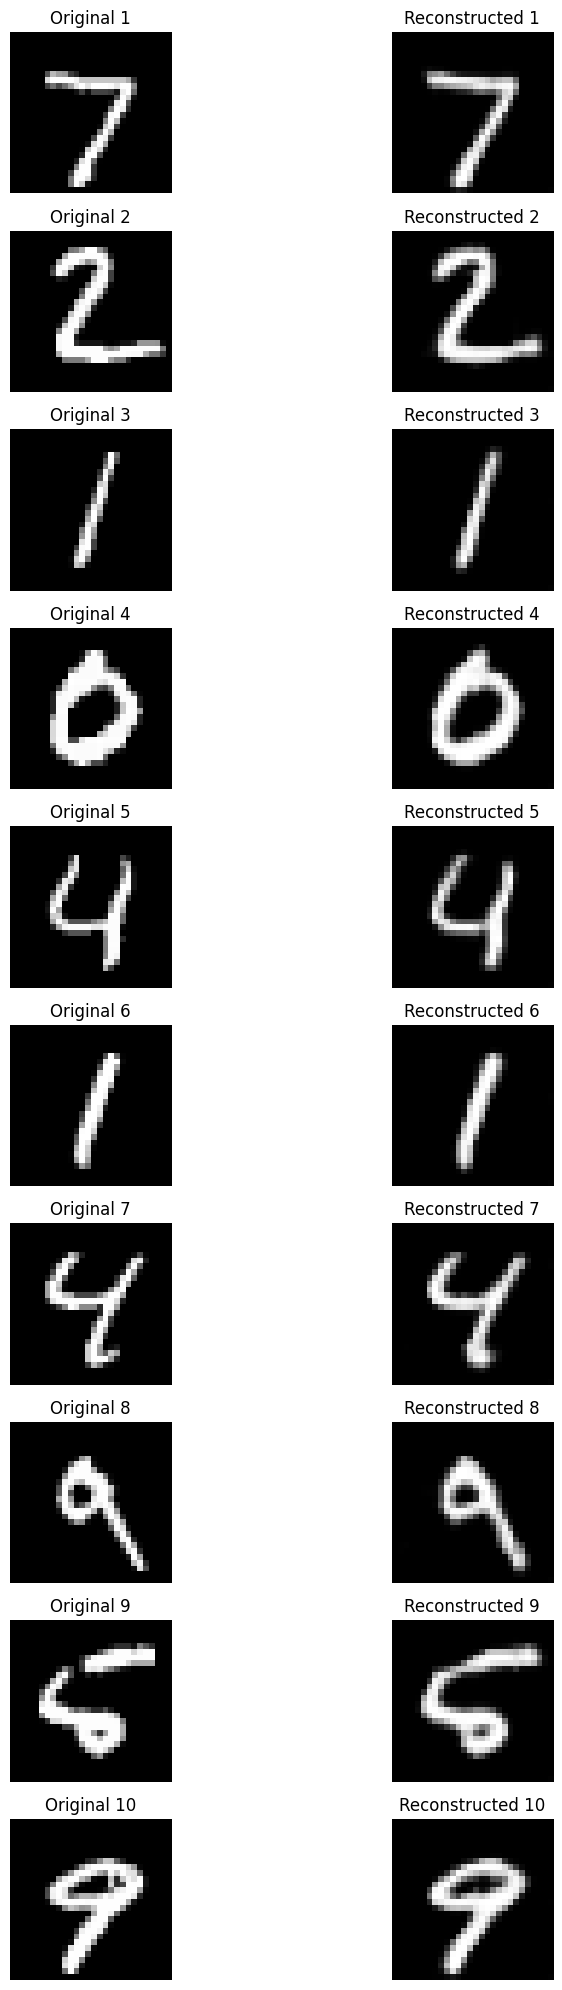

Rate is (bpp):  0.16326530612244897

Training model with latent size 5...
Epoch 1/30, Loss: 0.014975
Epoch 2/30, Loss: 0.007652
Epoch 3/30, Loss: 0.006881
Epoch 4/30, Loss: 0.006407
Epoch 5/30, Loss: 0.006101
Epoch 6/30, Loss: 0.005877
Epoch 7/30, Loss: 0.005690
Epoch 8/30, Loss: 0.005549
Epoch 9/30, Loss: 0.005437
Epoch 10/30, Loss: 0.005336
Epoch 11/30, Loss: 0.005263
Epoch 12/30, Loss: 0.005204
Epoch 13/30, Loss: 0.005142
Epoch 14/30, Loss: 0.005092
Epoch 15/30, Loss: 0.005047
Epoch 16/30, Loss: 0.005006
Epoch 17/30, Loss: 0.004970
Epoch 18/30, Loss: 0.004929
Epoch 19/30, Loss: 0.004911
Epoch 20/30, Loss: 0.004878
Epoch 21/30, Loss: 0.004845
Epoch 22/30, Loss: 0.004820
Epoch 23/30, Loss: 0.004801
Epoch 24/30, Loss: 0.004783
Epoch 25/30, Loss: 0.004765
Epoch 26/30, Loss: 0.004740
Epoch 27/30, Loss: 0.004721
Epoch 28/30, Loss: 0.004710
Epoch 29/30, Loss: 0.004684
Epoch 30/30, Loss: 0.004672


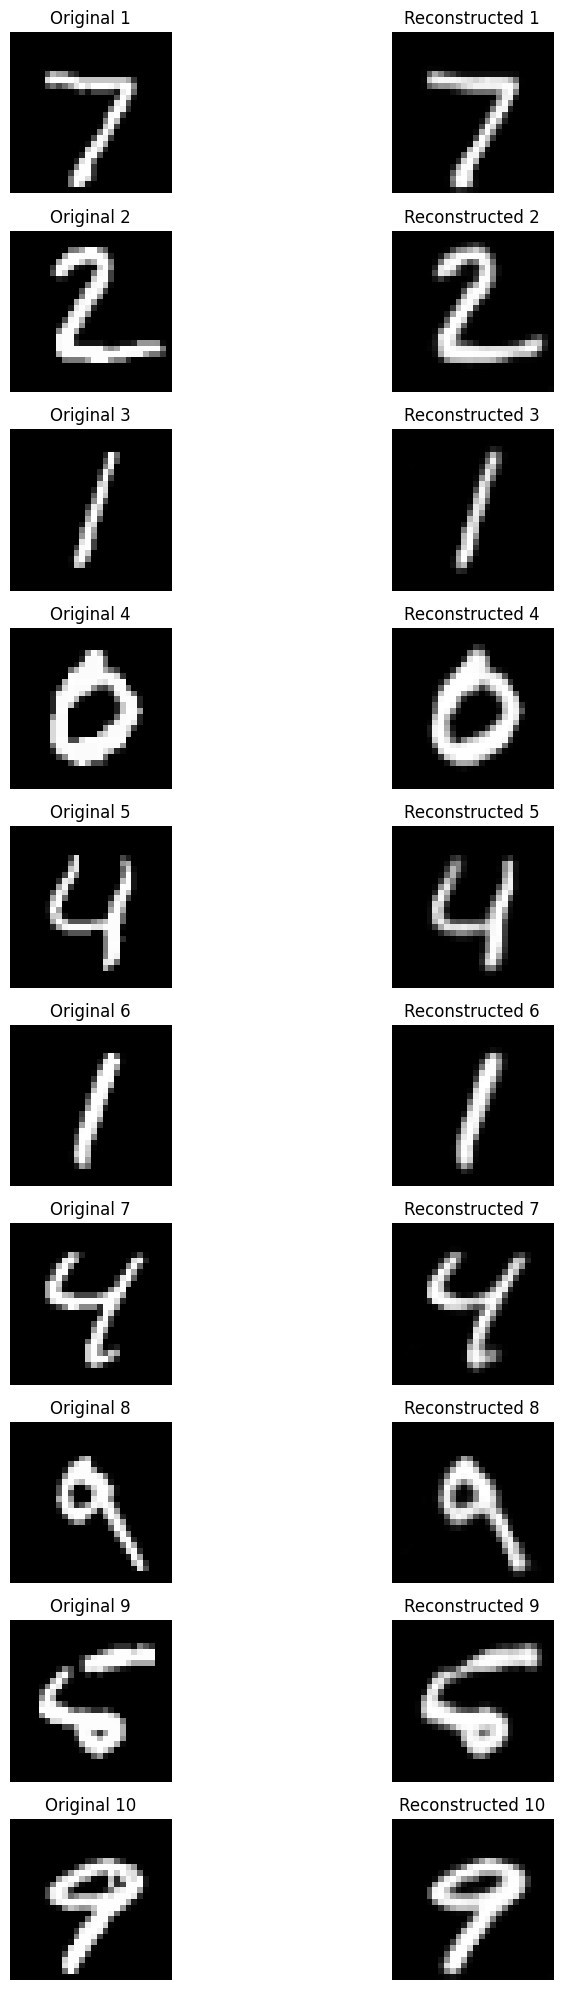

Rate is (bpp):  0.20408163265306123

Training model with latent size 10...
Epoch 1/30, Loss: 0.011495
Epoch 2/30, Loss: 0.004523
Epoch 3/30, Loss: 0.003975
Epoch 4/30, Loss: 0.003703
Epoch 5/30, Loss: 0.003505
Epoch 6/30, Loss: 0.003383
Epoch 7/30, Loss: 0.003287
Epoch 8/30, Loss: 0.003211
Epoch 9/30, Loss: 0.003152
Epoch 10/30, Loss: 0.003099
Epoch 11/30, Loss: 0.003057
Epoch 12/30, Loss: 0.003016
Epoch 13/30, Loss: 0.002988
Epoch 14/30, Loss: 0.002956
Epoch 15/30, Loss: 0.002935
Epoch 16/30, Loss: 0.002911
Epoch 17/30, Loss: 0.002885
Epoch 18/30, Loss: 0.002868
Epoch 19/30, Loss: 0.002856
Epoch 20/30, Loss: 0.002835
Epoch 21/30, Loss: 0.002823
Epoch 22/30, Loss: 0.002806
Epoch 23/30, Loss: 0.002798
Epoch 24/30, Loss: 0.002785
Epoch 25/30, Loss: 0.002773
Epoch 26/30, Loss: 0.002764
Epoch 27/30, Loss: 0.002755
Epoch 28/30, Loss: 0.002744
Epoch 29/30, Loss: 0.002741
Epoch 30/30, Loss: 0.002726


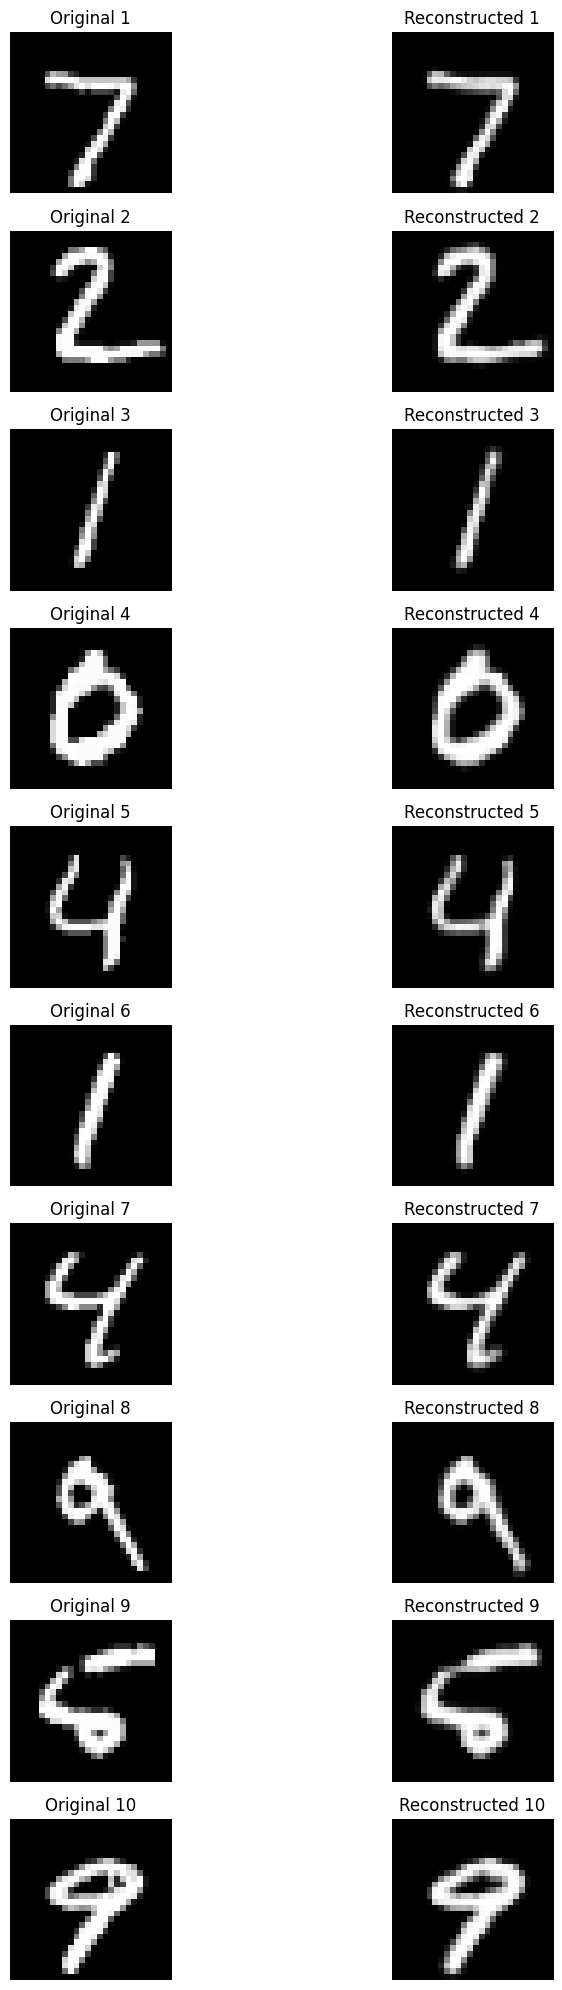

Rate is (bpp):  0.40816326530612246

Training model with latent size 15...
Epoch 1/30, Loss: 0.010374
Epoch 2/30, Loss: 0.003586
Epoch 3/30, Loss: 0.003090
Epoch 4/30, Loss: 0.002836
Epoch 5/30, Loss: 0.002680
Epoch 6/30, Loss: 0.002583
Epoch 7/30, Loss: 0.002508
Epoch 8/30, Loss: 0.002440
Epoch 9/30, Loss: 0.002403
Epoch 10/30, Loss: 0.002362
Epoch 11/30, Loss: 0.002331
Epoch 12/30, Loss: 0.002296
Epoch 13/30, Loss: 0.002276
Epoch 14/30, Loss: 0.002255
Epoch 15/30, Loss: 0.002234
Epoch 16/30, Loss: 0.002221
Epoch 17/30, Loss: 0.002207
Epoch 18/30, Loss: 0.002187
Epoch 19/30, Loss: 0.002174
Epoch 20/30, Loss: 0.002166
Epoch 21/30, Loss: 0.002153
Epoch 22/30, Loss: 0.002147
Epoch 23/30, Loss: 0.002134
Epoch 24/30, Loss: 0.002124
Epoch 25/30, Loss: 0.002117
Epoch 26/30, Loss: 0.002107
Epoch 27/30, Loss: 0.002106
Epoch 28/30, Loss: 0.002098
Epoch 29/30, Loss: 0.002088
Epoch 30/30, Loss: 0.002085


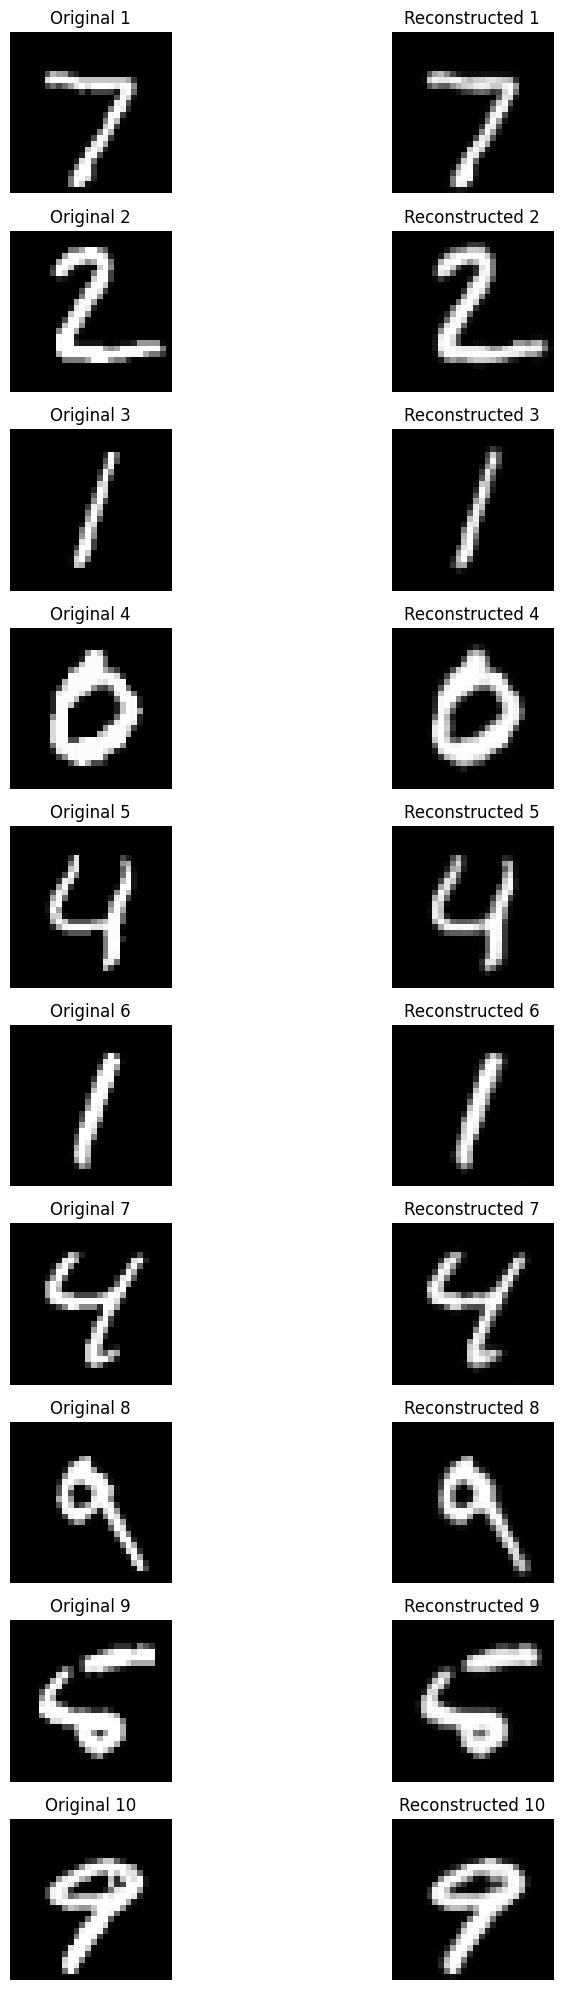

Rate is (bpp):  0.6122448979591837

Training model with latent size 20...
Epoch 1/30, Loss: 0.008948
Epoch 2/30, Loss: 0.003274
Epoch 3/30, Loss: 0.002800
Epoch 4/30, Loss: 0.002550
Epoch 5/30, Loss: 0.002389
Epoch 6/30, Loss: 0.002291
Epoch 7/30, Loss: 0.002225
Epoch 8/30, Loss: 0.002162
Epoch 9/30, Loss: 0.002125
Epoch 10/30, Loss: 0.002085
Epoch 11/30, Loss: 0.002054
Epoch 12/30, Loss: 0.002028
Epoch 13/30, Loss: 0.002008
Epoch 14/30, Loss: 0.001985
Epoch 15/30, Loss: 0.001965
Epoch 16/30, Loss: 0.001954
Epoch 17/30, Loss: 0.001941
Epoch 18/30, Loss: 0.001926
Epoch 19/30, Loss: 0.001916
Epoch 20/30, Loss: 0.001904
Epoch 21/30, Loss: 0.001894
Epoch 22/30, Loss: 0.001886
Epoch 23/30, Loss: 0.001877
Epoch 24/30, Loss: 0.001868
Epoch 25/30, Loss: 0.001860
Epoch 26/30, Loss: 0.001854
Epoch 27/30, Loss: 0.001848
Epoch 28/30, Loss: 0.001841
Epoch 29/30, Loss: 0.001835
Epoch 30/30, Loss: 0.001827


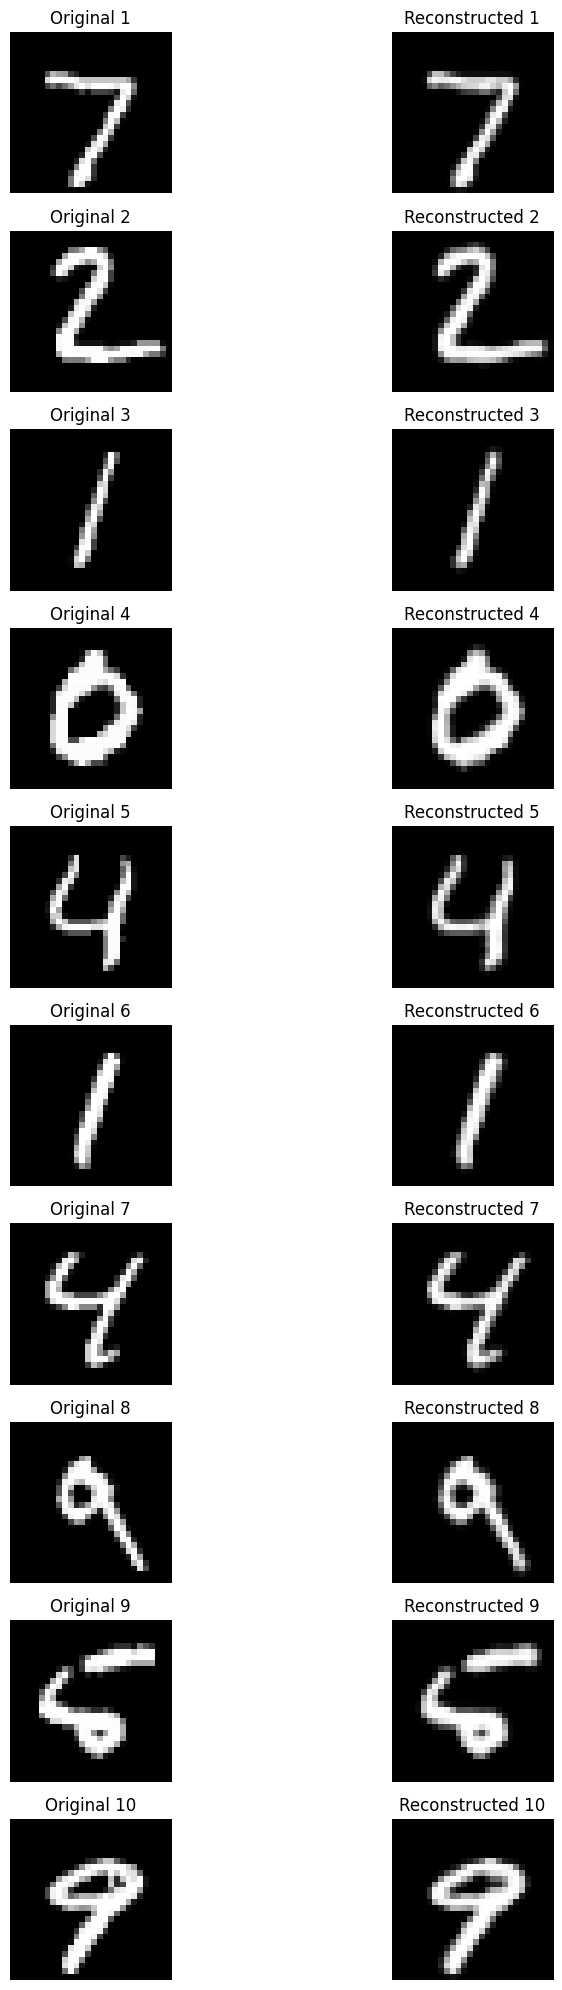

Rate is (bpp):  0.8163265306122449


In [89]:
latent_sizes = [2, 4, 5, 10, 15, 20]
epochs = 30
input_dim = 28 * 28

results2 = {"bpp": [], "psnr": [], "ssim": []}

# Training and evaluation loop
for latent_size in latent_sizes:
    print(f"\nTraining model with latent size {latent_size}...")
    model = ConvAutoEncoder(latent_size=latent_size).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()

    # Train model
    elapsed_time = train_conv_model(model, train_loader, optimizer, criterion, epochs, DEVICE)

    # Evaluate model
    bpp, psnr, ssim_val = evaluate_conv_rate_distortion(model, test_loader, latent_size, input_dim, DEVICE)
    results2["bpp"].append(bpp)
    results2["psnr"].append(psnr)
    results2["ssim"].append(ssim_val)



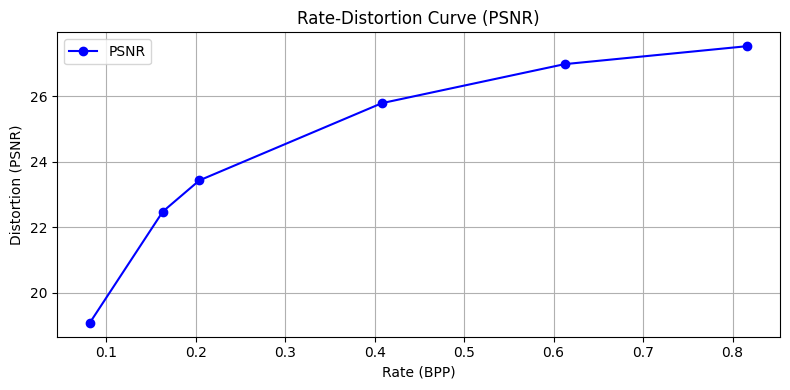

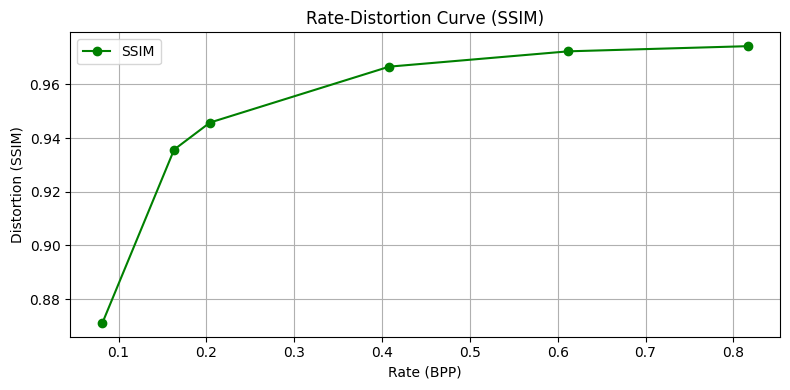

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(results2["bpp"], results2["psnr"], marker='o', label="PSNR", color='blue')
plt.xlabel("Rate (BPP)")
plt.ylabel("Distortion (PSNR)")
plt.title("Rate-Distortion Curve (PSNR)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(results2["bpp"], results2["ssim"], marker='o', label="SSIM", color='green')
plt.xlabel("Rate (BPP)")
plt.ylabel("Distortion (SSIM)")
plt.title("Rate-Distortion Curve (SSIM)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#3. Variational Autoencoder

On the other hand, Variational Autoencoders (VAEs) adopt a **probabilistic approach** to learning by modeling the latent space **as a distribution rather than a single point**. This means that instead of directly learning a fixed latent representation, a VAE learns to produce a range of possible values for each point in the latent space, captured by a **mean and variance** (or standard deviation). This allows the VAE to generate new data points by sampling from this learned distribution. Due to this probabilistic nature, VAEs are particularly useful for tasks such as generative modeling, where the goal is to create new realistic samples, and anomaly detection, where they can detect outliers by comparing how well a new input matches the learned distribution. This flexibility gives VAEs an advantage for handling complex and variable data, such as images, text, and more.

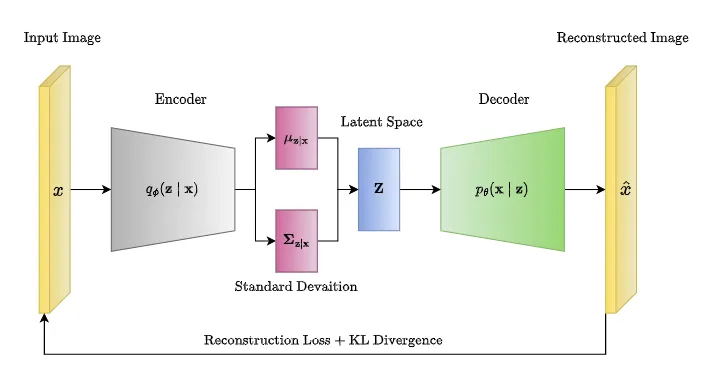

To transition from a traditional autoencoder to a VAE, we need to make two key modifications.

1. First, we need to replace the encoder's output with a probability distribution. Instead of the encoder producing a point in the latent space, **it generates the parameters of a probability distribution, such as the mean and variance**. This distribution is typically a multivariate Gaussian distribution, but it can also be another type of distribution.
2. Next, we **add a new term to the loss function called the Kullback-Leibler (KL) divergence**. This term measures how much the learned probability distribution of the latent space differs from a predefined prior distribution, usually a standard normal distribution. The KL divergence ensures that the learned distribution stays close to the prior, regularizing the model and ensuring that the latent space has a well-structured and meaningful representation.







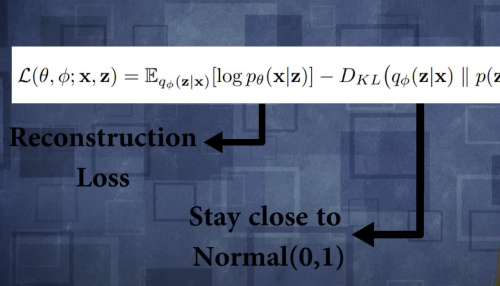

In [ ]:
x_dim  = 28*28
hidden_dim = 400
latent_dim = 200
lr = 1e-3

In [ ]:
class Encoder(nn.Module):

    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()

        self.FC_input = nn.Linear(input_dim, hidden_dim)
        self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)

        self.FC_mean  = nn.Linear(hidden_dim, latent_dim)
        self.FC_var   = nn.Linear (hidden_dim, latent_dim)

        self.LeakyReLU = nn.LeakyReLU(0.2)

        self.training = True

    def forward(self, x):
        h_       = self.LeakyReLU(self.FC_input(x))
        h_       = self.LeakyReLU(self.FC_input2(h_))
        mean     = self.FC_mean(h_)
        log_var  = self.FC_var(h_)


        return mean, log_var

In this implementation, the parameters that will be learned are the mean and the **log variance** (instead of the variance). Learning the log variance rather than the variance **helps improve numerical stability**. Learning the variance directly, which must always be a positive number, can lead to problems if the value becomes too small or too large, making the learning process unstable. By using the logarithm, we transform the variance into a real number that can be positive, negative, or zero. This allows the model to produce any real number, which is easier to train. The actual variance is then recovered by applying the exponential function to the log variance, ensuring that the result is always positive and manageable for the model.

In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.FC_hidden = nn.Linear(latent_dim, hidden_dim)
        self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_output = nn.Linear(hidden_dim, output_dim)

        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        h     = self.LeakyReLU(self.FC_hidden(x))
        h     = self.LeakyReLU(self.FC_hidden2(h))

        x_hat = torch.sigmoid(self.FC_output(h))
        return x_hat

In [ ]:
class Model(nn.Module):
    def __init__(self, Encoder, Decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder

    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(DEVICE)
        z = mean + var * epsilon
        return z


    def forward(self, x):
        mean, log_var = self.Encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var))
        x_hat            = self.Decoder(z)

        return x_hat, mean, log_var

In [ ]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

vae_model = Model(Encoder=encoder, Decoder=decoder).to(DEVICE)

In [ ]:
from torch.optim import Adam

def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD      = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD


optimizer = Adam(vae_model.parameters(), lr=lr)

In [ ]:
print("Start training VAE...")
vae_model.train()

for epoch in range(n_epochs):
    overall_loss = 0
    for batch_idx, (x, _) in enumerate(train_loader):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var = vae_model(x)
        loss = loss_function(x, x_hat, mean, log_var)

        overall_loss += loss.item()

        loss.backward()
        optimizer.step()

    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))

print("Finish!!")

Start training VAE...
	Epoch 1 complete! 	Average Loss:  150.28372502214464
	Epoch 2 complete! 	Average Loss:  119.12977132805987
	Epoch 3 complete! 	Average Loss:  113.9343492527811
	Epoch 4 complete! 	Average Loss:  111.47124028729418
	Epoch 5 complete! 	Average Loss:  109.94755240627605
	Epoch 6 complete! 	Average Loss:  108.97059915101345
	Epoch 7 complete! 	Average Loss:  108.13621684002449
	Epoch 8 complete! 	Average Loss:  107.4968508607102
	Epoch 9 complete! 	Average Loss:  107.02625179111088
	Epoch 10 complete! 	Average Loss:  106.58862332368305
	Epoch 11 complete! 	Average Loss:  106.23876108860463
	Epoch 12 complete! 	Average Loss:  105.97544340171035
	Epoch 13 complete! 	Average Loss:  105.71761223752084
	Epoch 14 complete! 	Average Loss:  105.46922102552496
	Epoch 15 complete! 	Average Loss:  105.30521286945732
	Epoch 16 complete! 	Average Loss:  105.13644564629794
	Epoch 17 complete! 	Average Loss:  104.98820397170697
	Epoch 18 complete! 	Average Loss:  104.83810108052835

In [ ]:
def show_images_side_by_side(original, reconstructed, idx):
    original = original.view(-1, 28, 28)
    reconstructed = reconstructed.view(-1, 28, 28)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].imshow(original[idx].cpu().numpy(), cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis('off')


    axes[1].imshow(reconstructed[idx].cpu().numpy(), cmap="gray")
    axes[1].set_title("Reconstructed Image")
    axes[1].axis('off')

    plt.show()

  0%|          | 0/400 [00:00<?, ?it/s]

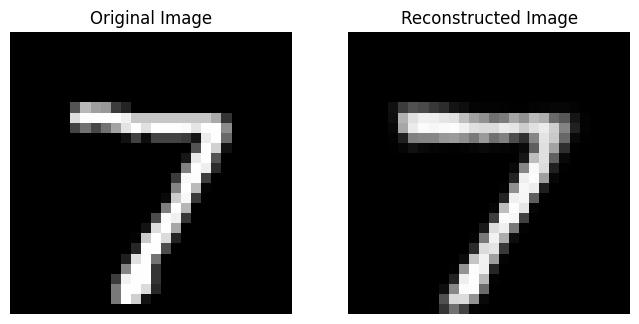

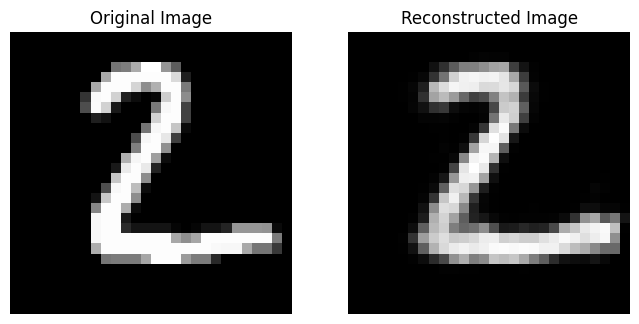

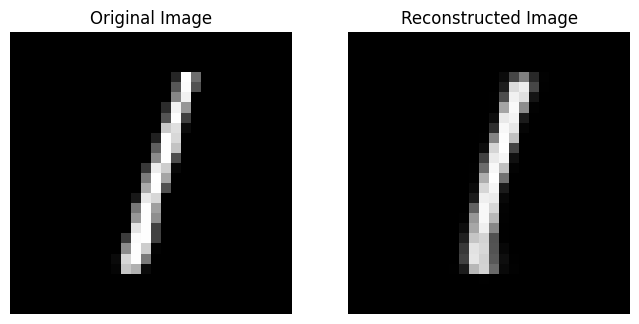

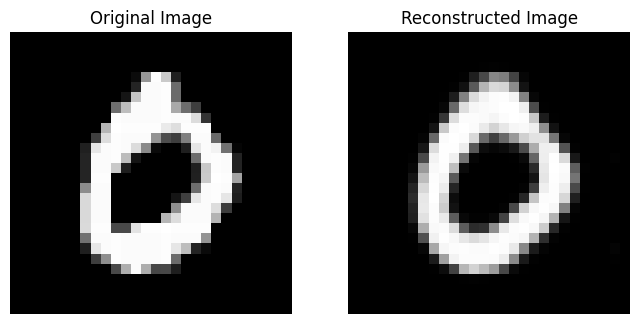

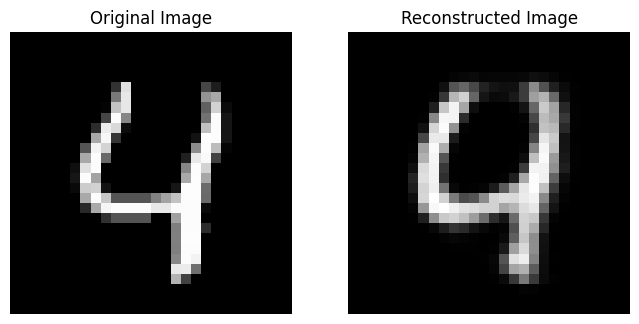

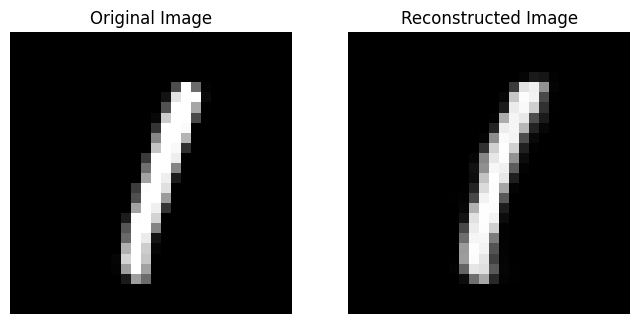

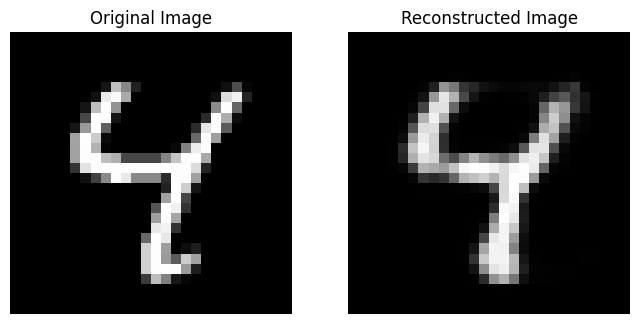

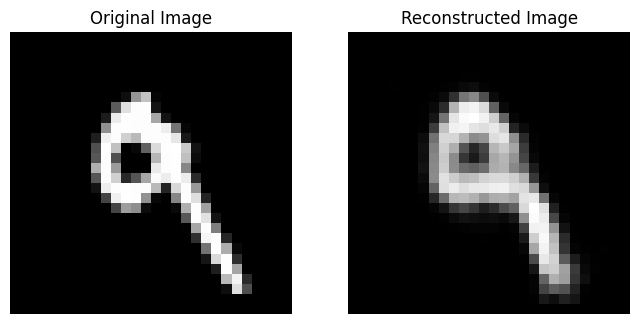

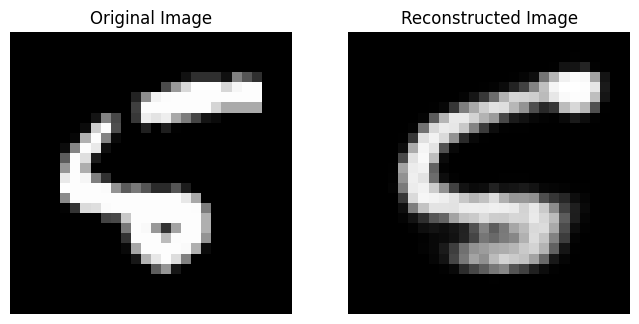

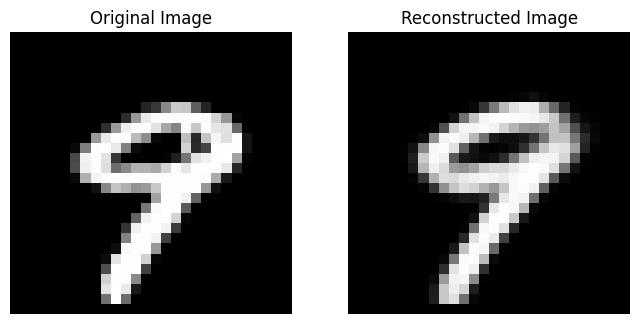

  0%|          | 0/400 [00:01<?, ?it/s]


In [ ]:
vae_model.eval()

with torch.no_grad():
    for batch_idx, (x, _) in enumerate(tqdm(test_loader)):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)
        x_hat, _, _ = vae_model(x)
        for idx in range(10):
            show_images_side_by_side(x, x_hat, idx)
        break
